In [310]:
import pandas as pd
import numpy as np
import scipy.stats as stats

df = pd.read_pickle('../data/relationship_features_all')

df = df[df["message_count"]!=0]

df_high= pd.read_pickle('../data/relationship_features_high_non_romantic')

df_low = pd.read_pickle('../data/relationship_features_low_non_romantic')

df_high = df_high[df_high["message_count"]!=0]
df_low = df_low[df_low["message_count"]!=0]


predictors =["neutral","negative","positive","compound","message_count_reciprocity","word_count","word_count_reciprocity","response_time","response_time_reciprocity","sentiment_reciprocity"]


df = df[predictors]
df_high = df_high[predictors]
df_low = df_low[predictors]

df.dropna(inplace = True)
df_high.dropna(inplace = True)
df_low.dropna(inplace = True)

print df_high.shape
print df_low.shape

(2990, 10)
(1079, 10)


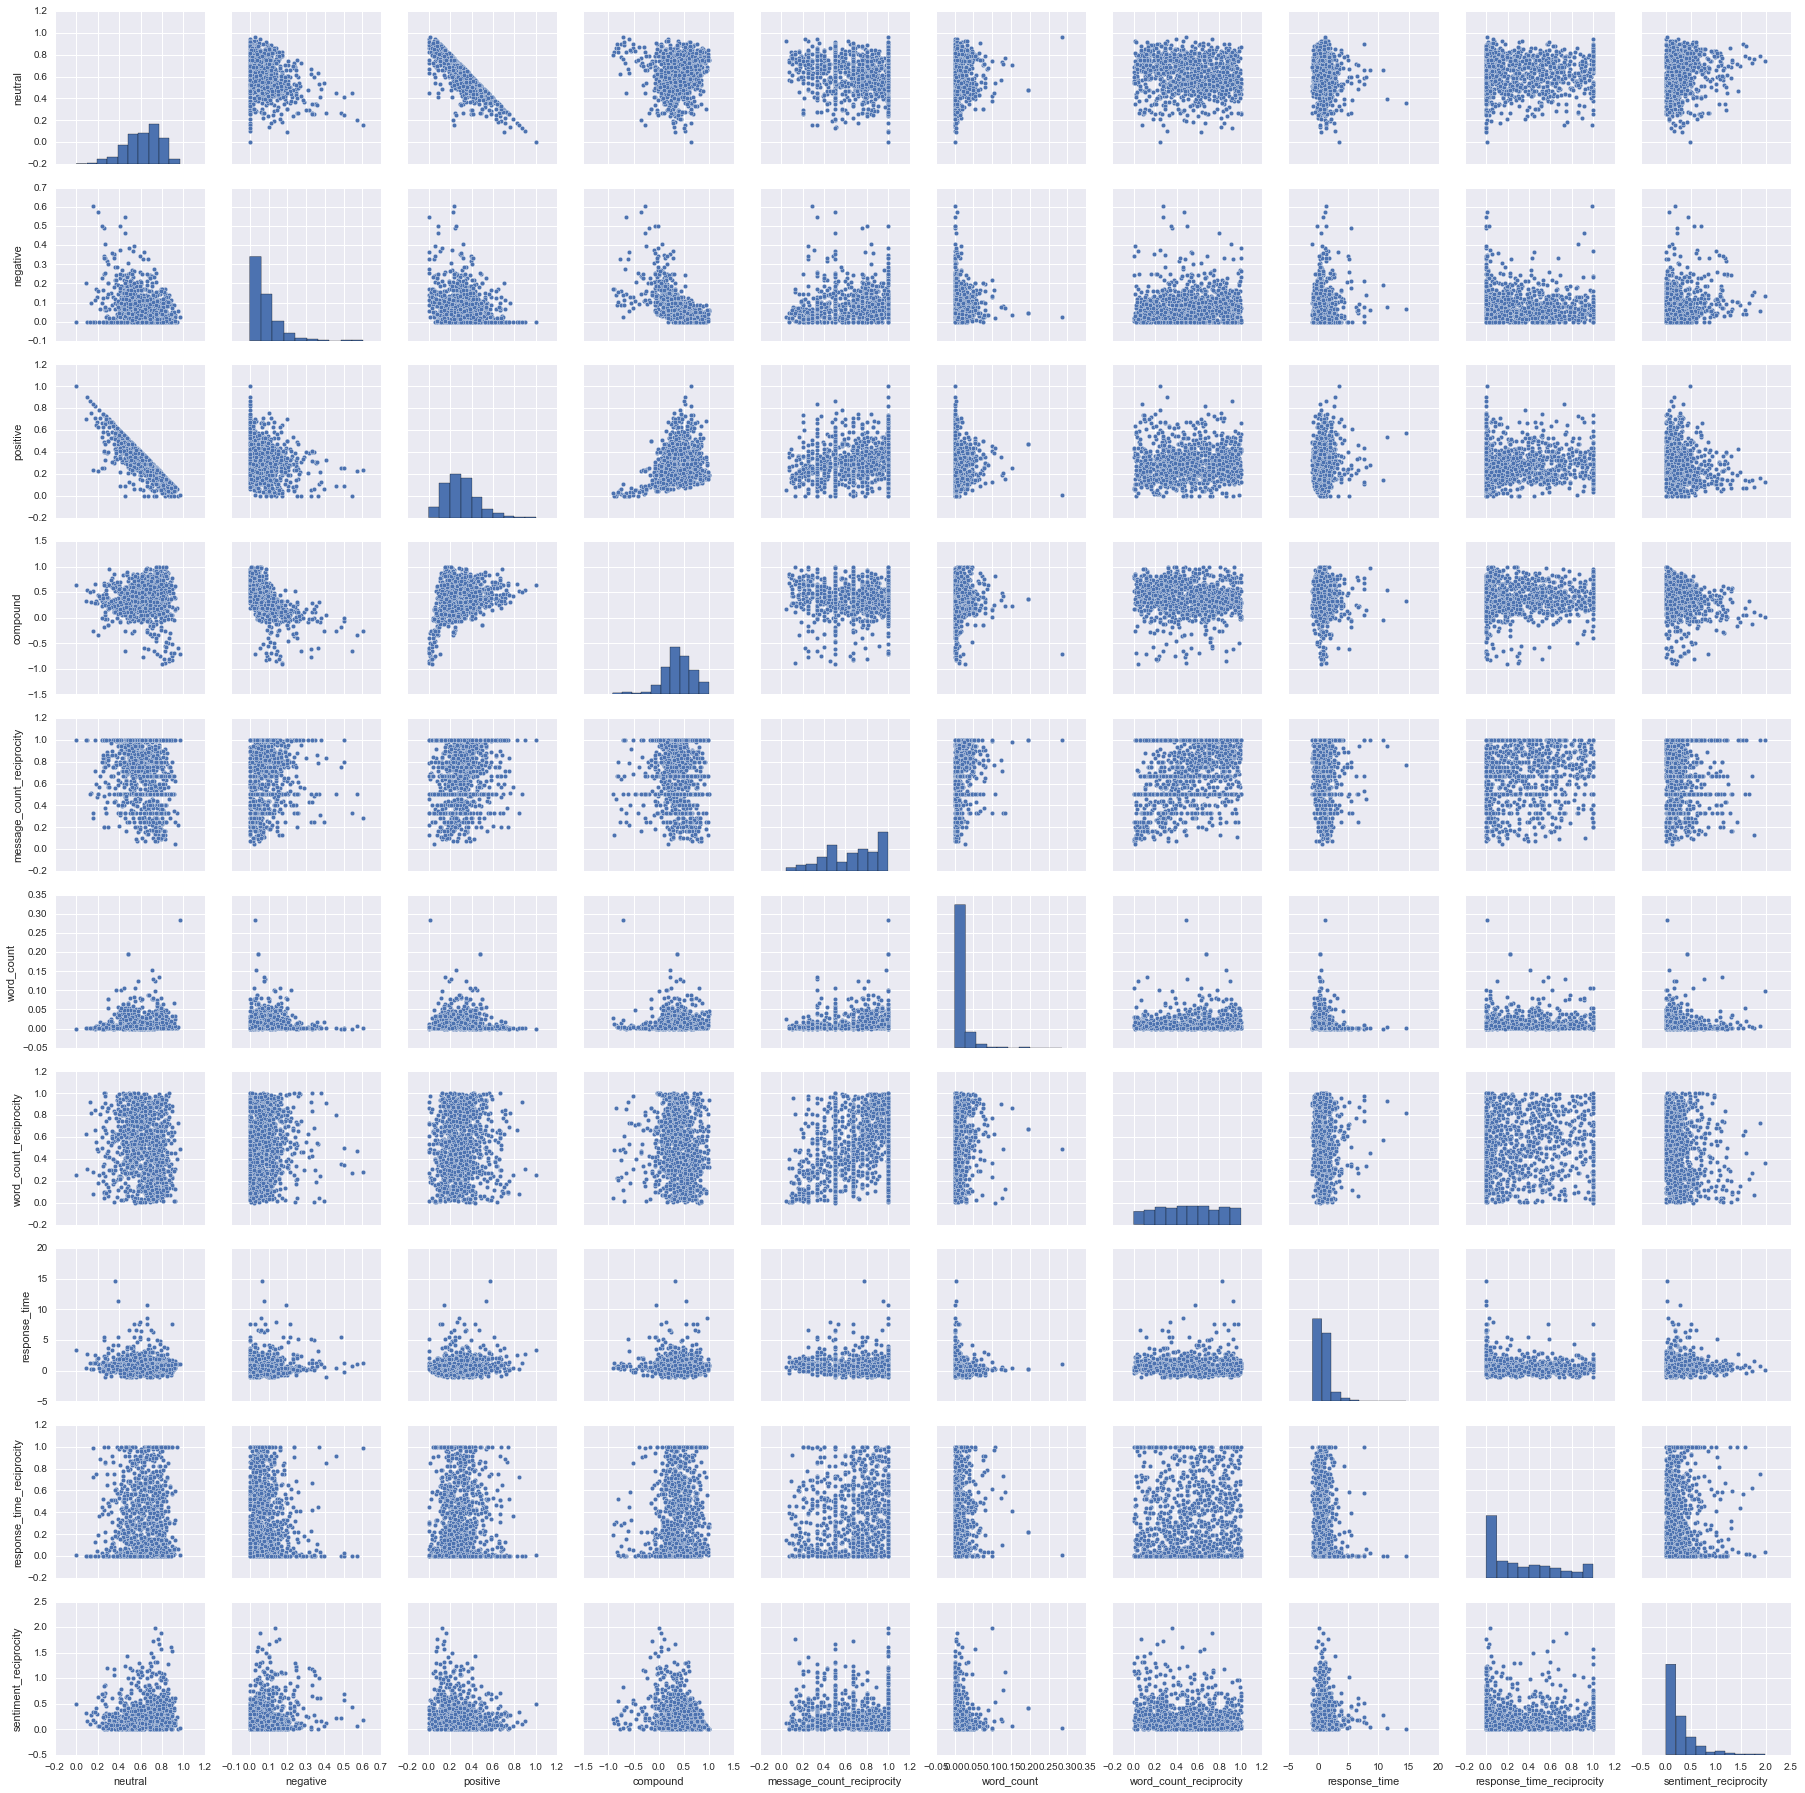

In [311]:
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline  


s = sns.pairplot(df_low)

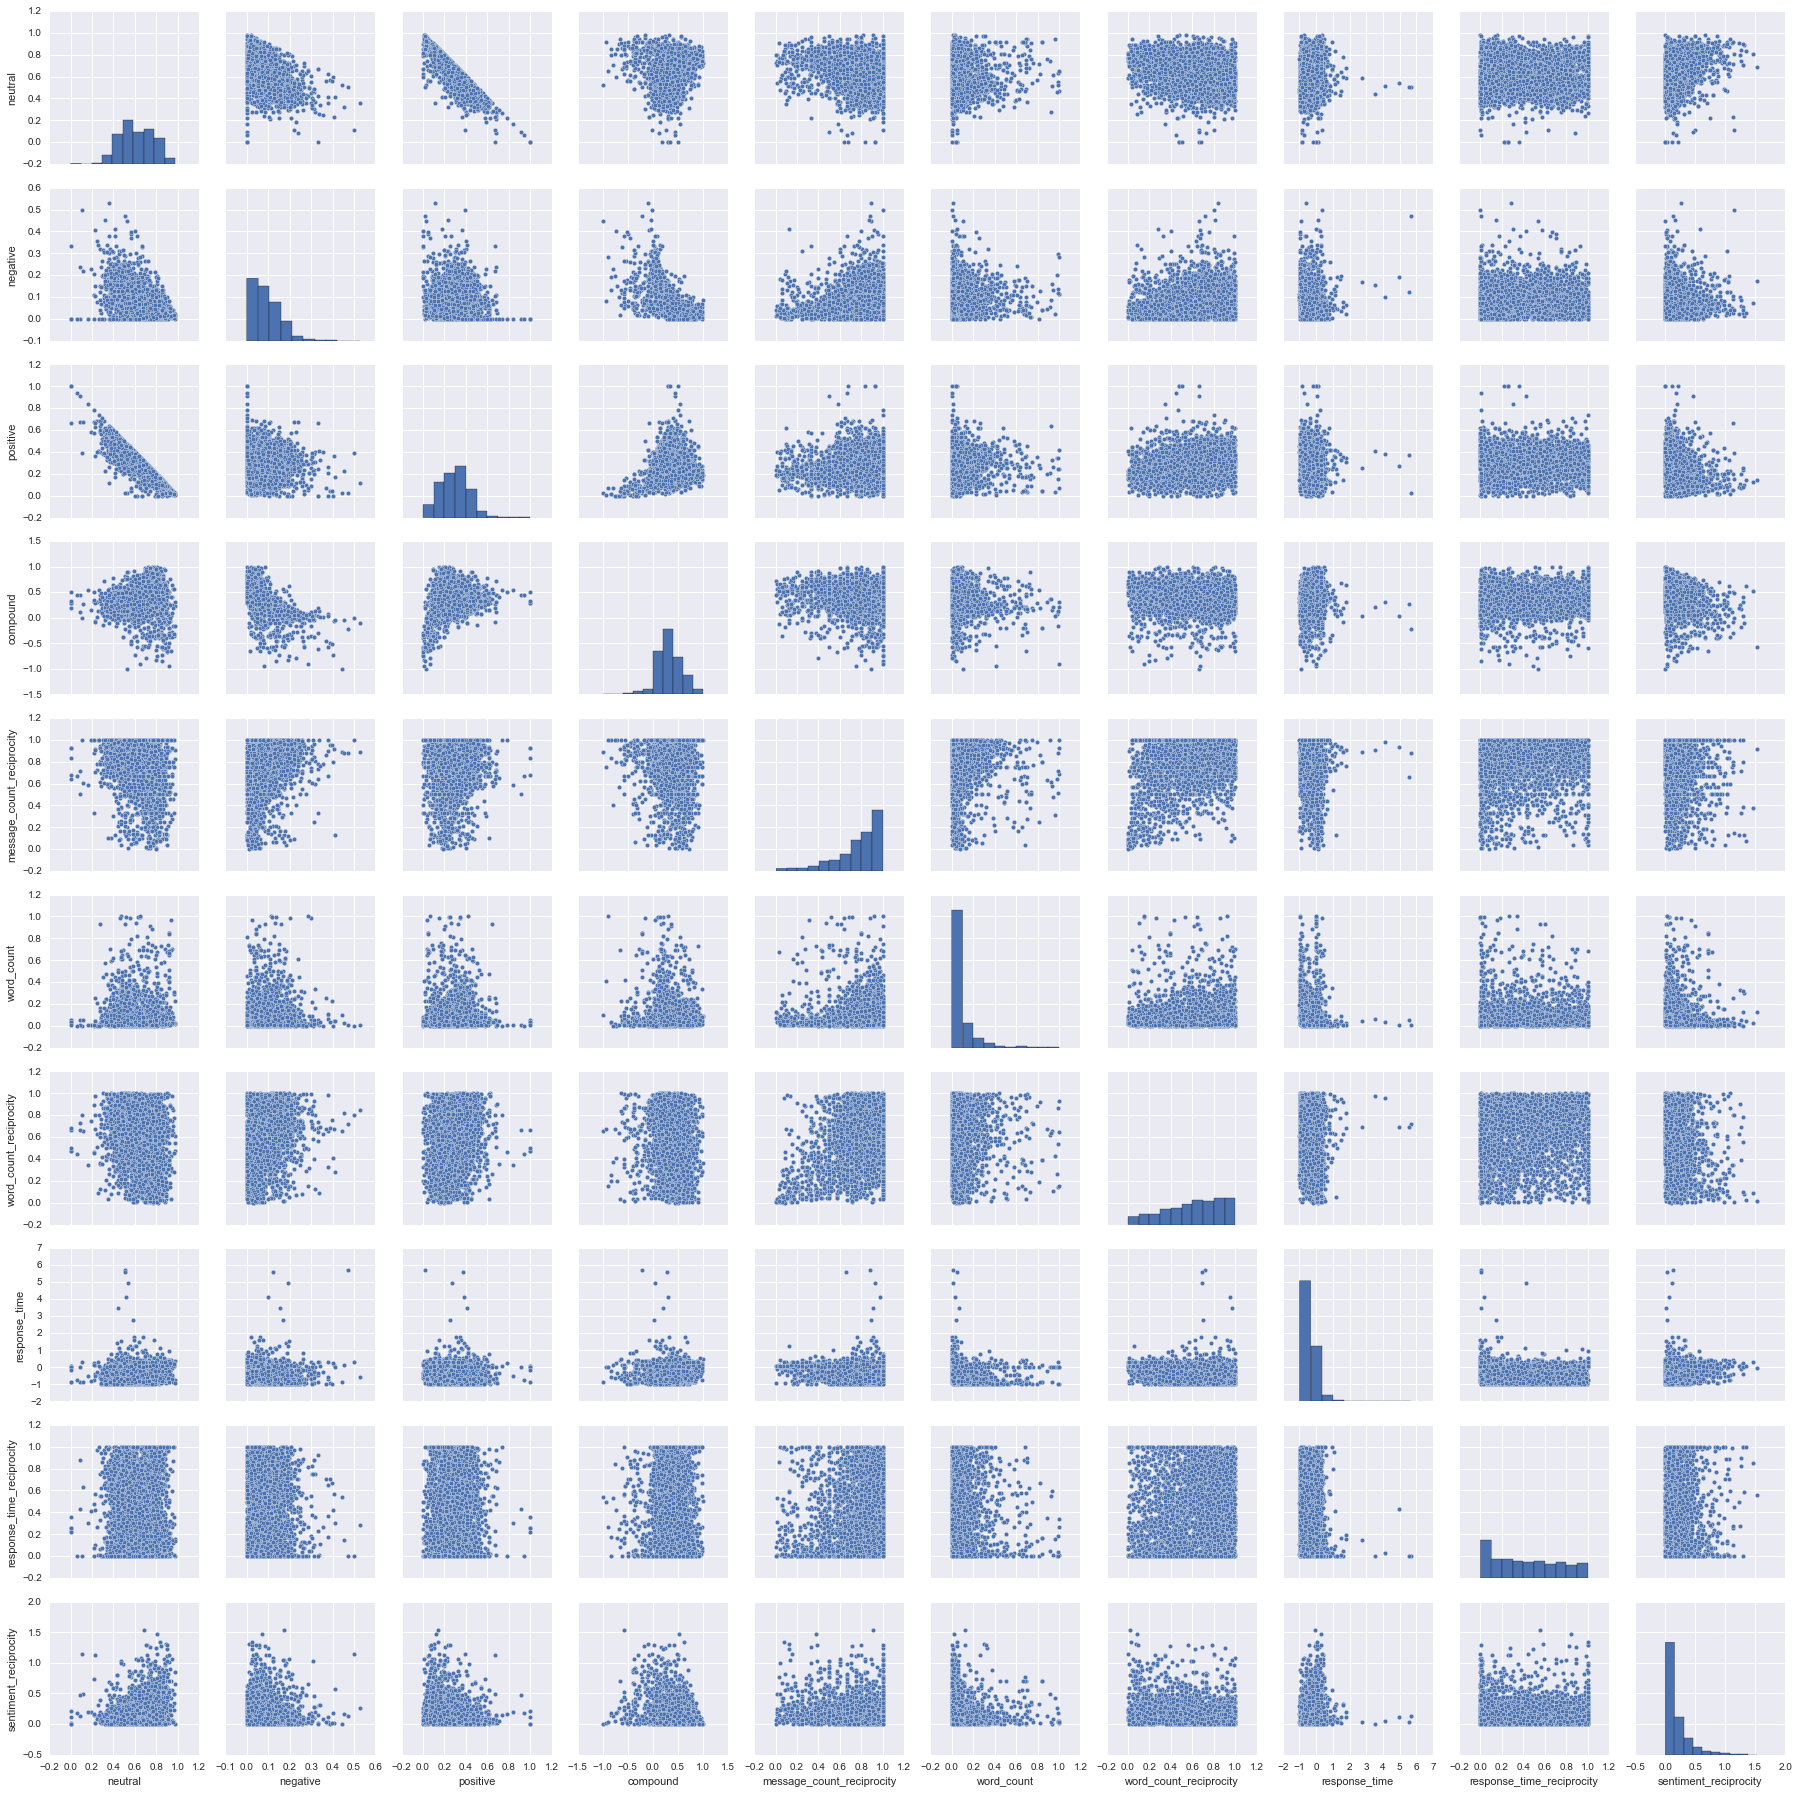

In [312]:
s = sns.pairplot(df_high)

In [313]:
df_high['label']=1
df_low['label']=0

label_data = pd.concat([df_high,df_low])

import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split

train, test = train_test_split(label_data, test_size = 0.2)

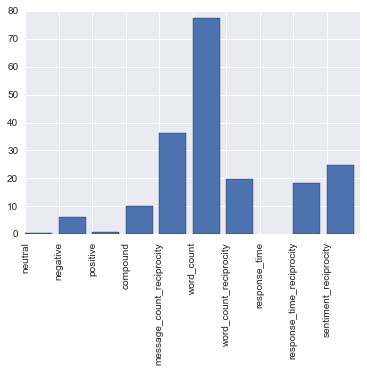

In [314]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
from sklearn.feature_selection import SelectKBest, f_classif


X_train = train[predictors]
y_train = train["label"]

X_test = test[predictors]
y_test = test["label"]

selector = SelectKBest(f_classif, k=5)
selector.fit(label_data[predictors], label_data["label"])

scores = -np.log10(selector.pvalues_)

# Plot the scores.
plt.bar(range(len(predictors)), scores)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.show()

predictors =["neutral","negative","positive","compound","message_count_reciprocity","word_count","word_count_reciprocity","response_time","response_time_reciprocity","sentiment_reciprocity"]

X_train = train[predictors]
X_test = test[predictors]

In [315]:
model = LogisticRegression()
model = model.fit(X_train, y_train)

probs = model.predict_proba(X_test)

In [316]:
pd.DataFrame(zip(X_train.columns, np.transpose(model.coef_)))

,0,1
0,neutral,[0.867590483628]
1,negative,[-0.303611322396]
2,positive,[-0.258976874964]
3,compound,[-0.439891566693]
4,message_count_reciprocity,[0.31811016573]
5,word_count,[7.22655353589]
6,word_count_reciprocity,[-0.226177536237]
7,response_time,[-2.43822192448]
8,response_time_reciprocity,[0.194807149957]
9,sentiment_reciprocity,[-0.281185101962]


In [317]:
# generate class probabilities
predicted = model.predict(X_test)
print predicted

probs = model.predict_proba(X_test)
print probs

[1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1
 1 1 1 1 1 0 1 0 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0
 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1
 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1
 1 0 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 0 0 1 0 0 1 1 1 

In [318]:
print metrics.accuracy_score(y_test, predicted)
print metrics.roc_auc_score(y_test, probs[:, 1])

0.872235872236
0.916994743103


In [319]:
print metrics.confusion_matrix(y_test, predicted)
print metrics.classification_report(y_test, predicted)

[[132  87]
 [ 17 578]]
             precision    recall  f1-score   support

          0       0.89      0.60      0.72       219
          1       0.87      0.97      0.92       595

avg / total       0.87      0.87      0.86       814



In [320]:
# evaluate the model using 10-fold cross-validation

X = label_data[predictors]
y = label_data["label"]
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=5)
print scores
print scores.mean()

[ 0.89312039  0.86486486  0.86855037  0.87469287  0.86592866]
0.873431432103


In [323]:
#predict for a particular case 

df = pd.read_csv("../data/user_df/data_frame_12305_33102")
#df = df[predictors]

df

,Unnamed: 0,message_count,message_count_user,message_count_contact,sent_at,relationship,word_count,word_count_user,word_count_contact,positive,...,compound,compound_user,compound_contact,response_time,response_time_user,response_time_contact,sentiment_reciprocity,message_count_reciprocity,word_count_reciprocity,response_time_reciprocity
0,2013-12-31,0.035088,0.02,0.041322,NaN,NaN,0.036591,0.033869,0.038389,0.226000,...,0.843625,0.993300,0.793733,0.084008,0.153443,0.214569,0.199567,0.200000,0.582716,0.703623
1,2014-01-31,0.005848,0.02,0.000000,NaN,NaN,0.005252,0.013203,0.000000,0.221000,...,0.971100,0.971100,NaN,-0.664490,-0.649047,NaN,NaN,0.000000,0.000000,NaN
2,2014-04-30,0.011696,0.00,0.016529,NaN,NaN,0.008677,0.000000,0.014408,0.274000,...,0.993100,NaN,0.993100,0.102687,NaN,0.726165,NaN,0.000000,0.000000,NaN
3,2014-05-31,0.011696,0.02,0.008264,NaN,NaN,0.044526,0.058984,0.034976,0.142500,...,0.987650,0.978600,0.996700,0.102687,0.153443,0.180497,0.018100,1.000000,0.897810,0.683884
4,2014-08-31,0.029240,0.04,0.024793,NaN,NaN,0.036591,0.028559,0.041896,0.182250,...,0.940550,0.894550,0.986550,0.102687,0.153443,-0.954067,0.092000,0.666667,0.450226,0.026610
5,2014-09-30,0.052632,0.06,0.049587,NaN,NaN,0.057370,0.066160,0.051564,0.230714,...,0.979586,0.975967,0.982300,0.102687,0.153443,-0.372427,0.006333,0.500000,0.847426,0.363565
6,2014-10-31,0.035088,0.04,0.033058,NaN,NaN,0.028085,0.017222,0.035261,0.237250,...,0.896075,0.964400,0.873300,0.102687,0.153443,0.588248,0.091100,0.500000,0.322581,0.920102
7,2014-11-30,0.040936,0.06,0.033058,NaN,NaN,0.081459,0.077784,0.083886,0.179167,...,0.971300,0.968350,0.972775,-0.052675,0.153443,-0.536198,0.004425,0.750000,0.612429,0.268689
8,2014-12-31,0.023392,0.04,0.016529,NaN,NaN,0.129467,0.075631,0.165024,0.214250,...,0.902225,0.804850,0.999600,0.102687,0.153443,-0.822957,0.194750,1.000000,0.302700,0.102564
9,2015-01-31,0.005848,0.02,0.000000,NaN,NaN,0.020094,0.050517,0.000000,0.146000,...,0.990200,0.990200,NaN,0.102687,0.153443,NaN,NaN,0.000000,0.000000,NaN


In [322]:
df_pred = df[predictors]

df_pred.dropna(inplace = True)

output = model.predict_proba(df_pred)
positive =output[:,1]

print positive.mean()

df_pred["output"] = positive


df_pred

/Users/Camila/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/Camila/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.71557242312


,neutral,negative,positive,compound,message_count_reciprocity,word_count,word_count_reciprocity,response_time,response_time_reciprocity,sentiment_reciprocity,output
1,0.432000,0.568000,0.000000,-0.667250,0.500000,0.000835,0.687500,0.278441,0.010038,0.135700,0.523370
2,0.608000,0.061000,0.331000,0.316725,0.500000,0.001329,0.720000,-0.361823,0.096814,0.236233,0.806523
6,0.368667,0.000000,0.631333,0.573267,1.000000,0.001298,0.200000,0.278441,0.063725,0.257050,0.438036
7,0.705200,0.005800,0.289000,0.602140,0.285714,0.004884,0.253968,0.278441,0.065737,0.089850,0.487732
8,0.705500,0.019750,0.274750,0.347675,0.333333,0.002875,0.056818,0.278441,0.191571,0.279633,0.519725
9,0.821706,0.063176,0.115235,0.369776,0.500000,0.047448,0.330156,-0.729934,0.794308,0.200407,0.957296
10,0.858792,0.048958,0.092292,0.372294,0.766667,0.253717,0.409341,-0.721013,0.372448,0.098034,0.990373
11,0.855900,0.035867,0.108233,0.499013,0.300000,0.151371,0.158505,-0.790882,0.783877,0.083081,0.981987
14,0.813250,0.052500,0.134250,0.351800,0.750000,0.007604,0.359116,0.278441,0.002729,0.312133,0.562047
15,0.821100,0.010300,0.168500,0.515490,0.142857,0.021823,0.161184,-0.746015,0.052257,0.002512,0.939184
